## Company Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
company = pd.read_csv('Company_Data.csv')
company.shape

(400, 11)

In [ ]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [ ]:
company['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [ ]:
company[company.duplicated()]

In [ ]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

*transforming data types*

In [ ]:
company['US'] = company['US'].replace('Yes',1)
company['US'] = company['US'].replace('No',0)
company['Urban'] = company['Urban'].replace('Yes',1)
company['Urban'] = company['Urban'].replace('No',0)

In [ ]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [ ]:
company.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                             
Bad       0     0      11         11      11           11          11     11   
                1      11         11      11           11          11     11   
          1     0      23         23      23           23          23     23   
                1      51         51      51           51          51     51   
Good      0     0       6          6       6            6           6      6   
                1      22         22      22           22          22     22   
          1     0      18         18      18           18          18     18   
                1      39         39      39           39          39     39   
Medium    0     0      29         29      29           29          29     29   
                1      39         39      39           39          39     39   
          1     0      55         55      55           55          55     55   
                1      96         96      96           96          96     96   

                    Age  Education  
ShelveLoc Urban US                  
Bad       0     0    11         11  
                1    11         11  
          1     0    23         23  
                1    51         51  
Good      0     0     6          6  
                1    22         22  
          1     0    18         18  
                1    39         39  
Medium    0     0    29         29  
                1    39         39  
          1     0    55         55  
                1    96         96

In [ ]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
company1 = pd.get_dummies(company,columns=['ShelveLoc'])
company1.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   Urban  US  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  
0      1   1              1               0                 0  
1      1   1              0               1                 0  
2      1   1              0               0                 1  
3      1   1              0               0                 1  
4      1   0              1               0                 0

In [ ]:
company1 = company1.rename({'ShelveLoc_Bad' : 'Bad'}, axis = 1)
company1 = company1.rename({'ShelveLoc_Good' : 'Good'}, axis = 1)
company1 = company1.rename({'ShelveLoc_Medium' : 'Medium'}, axis = 1)

In [ ]:
company1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban', 'US', 'Bad', 'Good', 'Medium'],
      dtype='object')

In [ ]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    int64  
 9   US           400 non-null    int64  
 10  Bad          400 non-null    uint8  
 11  Good         400 non-null    uint8  
 12  Medium       400 non-null    uint8  
dtypes: float64(1), int64(9), uint8(3)
memory usage: 32.5 KB


In [ ]:
company1.shape

(400, 13)

Data Visualization

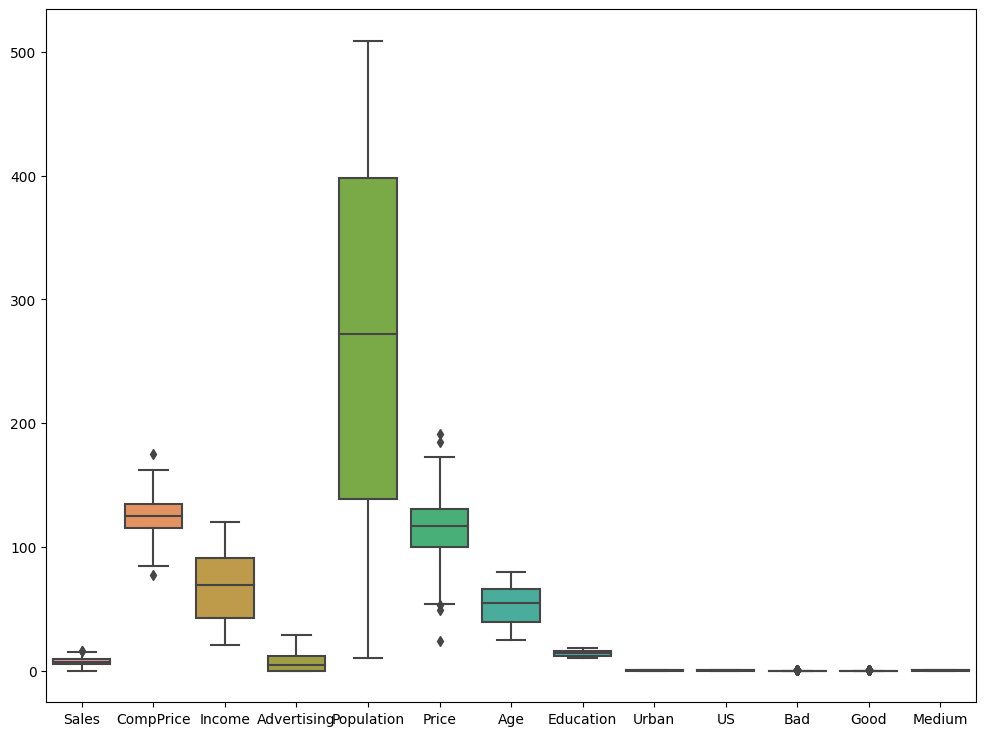

In [ ]:
plt.figure(figsize = (12,9))
sns.boxplot(data=company1, orient='v')

plt.show()

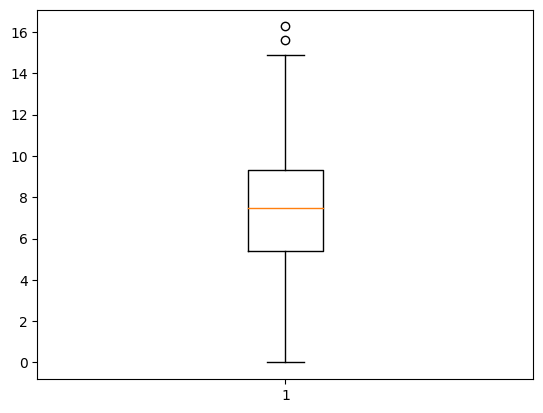

In [ ]:
plt.boxplot(company['Sales'])
plt.show()

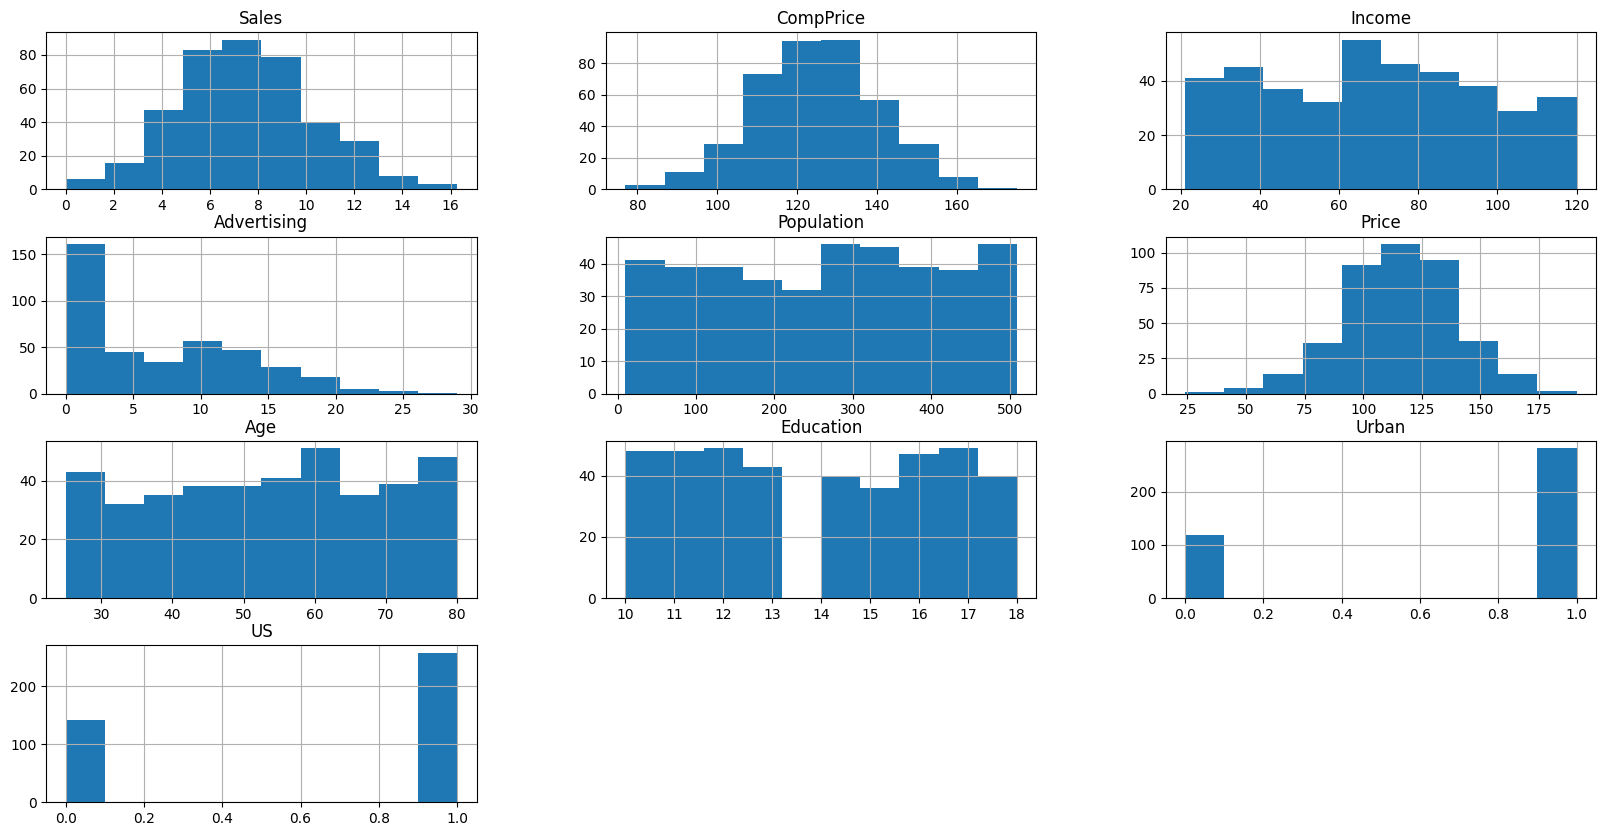

In [ ]:
company.hist(figsize=(20,10))
plt.show()

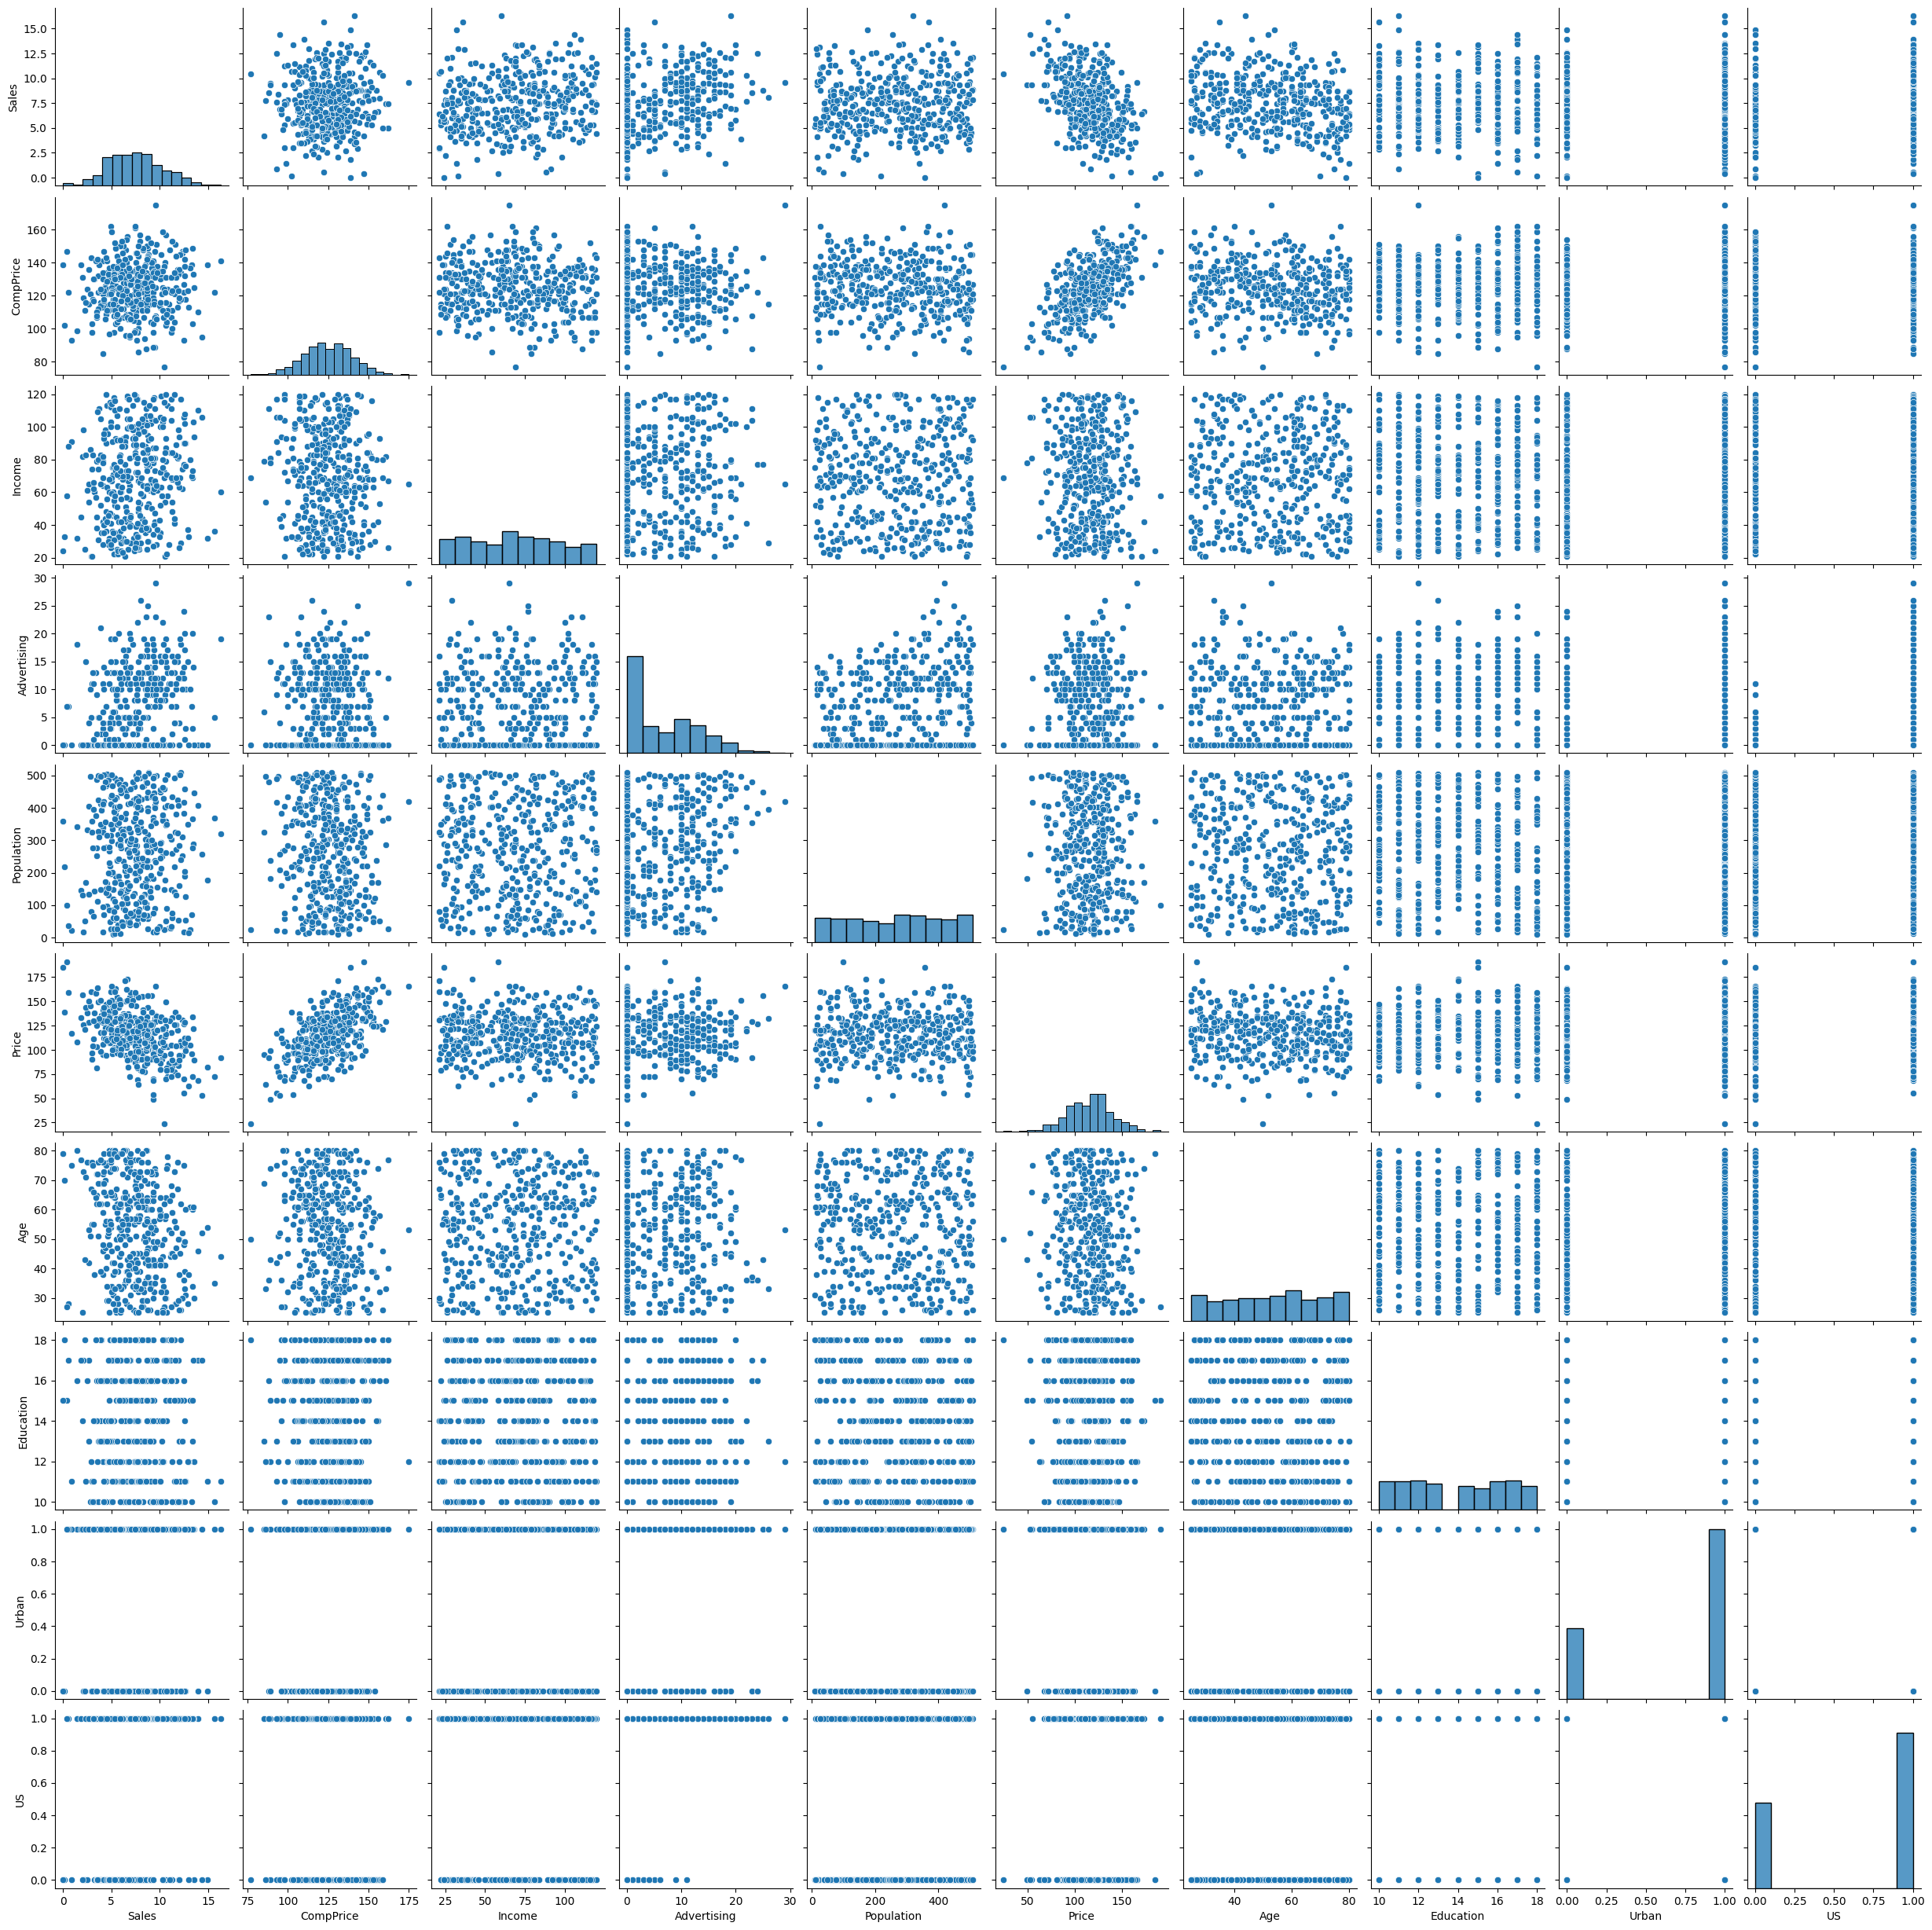

In [ ]:
sns.pairplot(company)
plt.show()

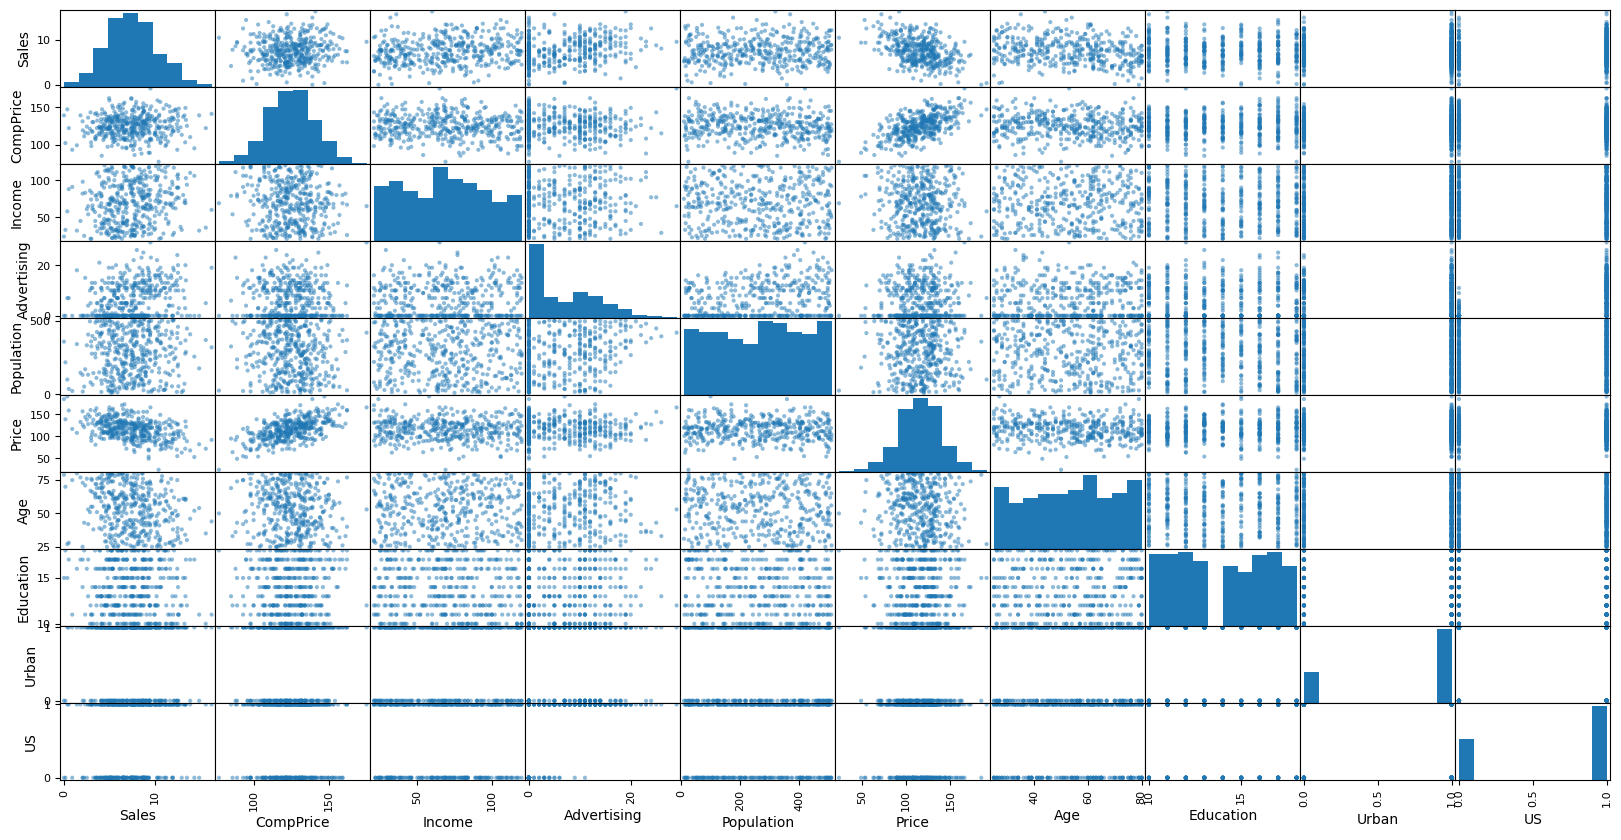

In [ ]:
pd.plotting.scatter_matrix(company,figsize=(20,10))
plt.show()

<Axes: xlabel='ShelveLoc', ylabel='Sales'>

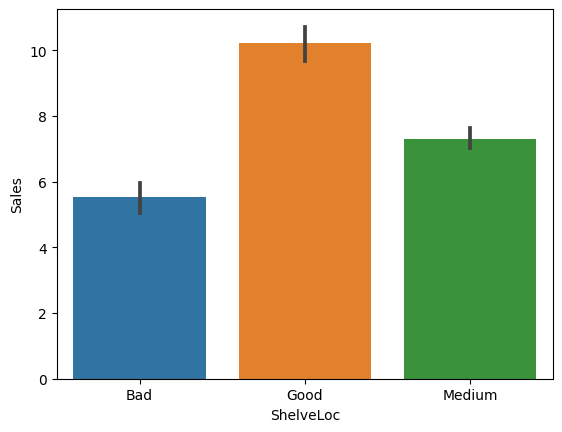

In [ ]:
sns.barplot(x='ShelveLoc', y='Sales', data=company)

<Axes: xlabel='Price', ylabel='Sales'>

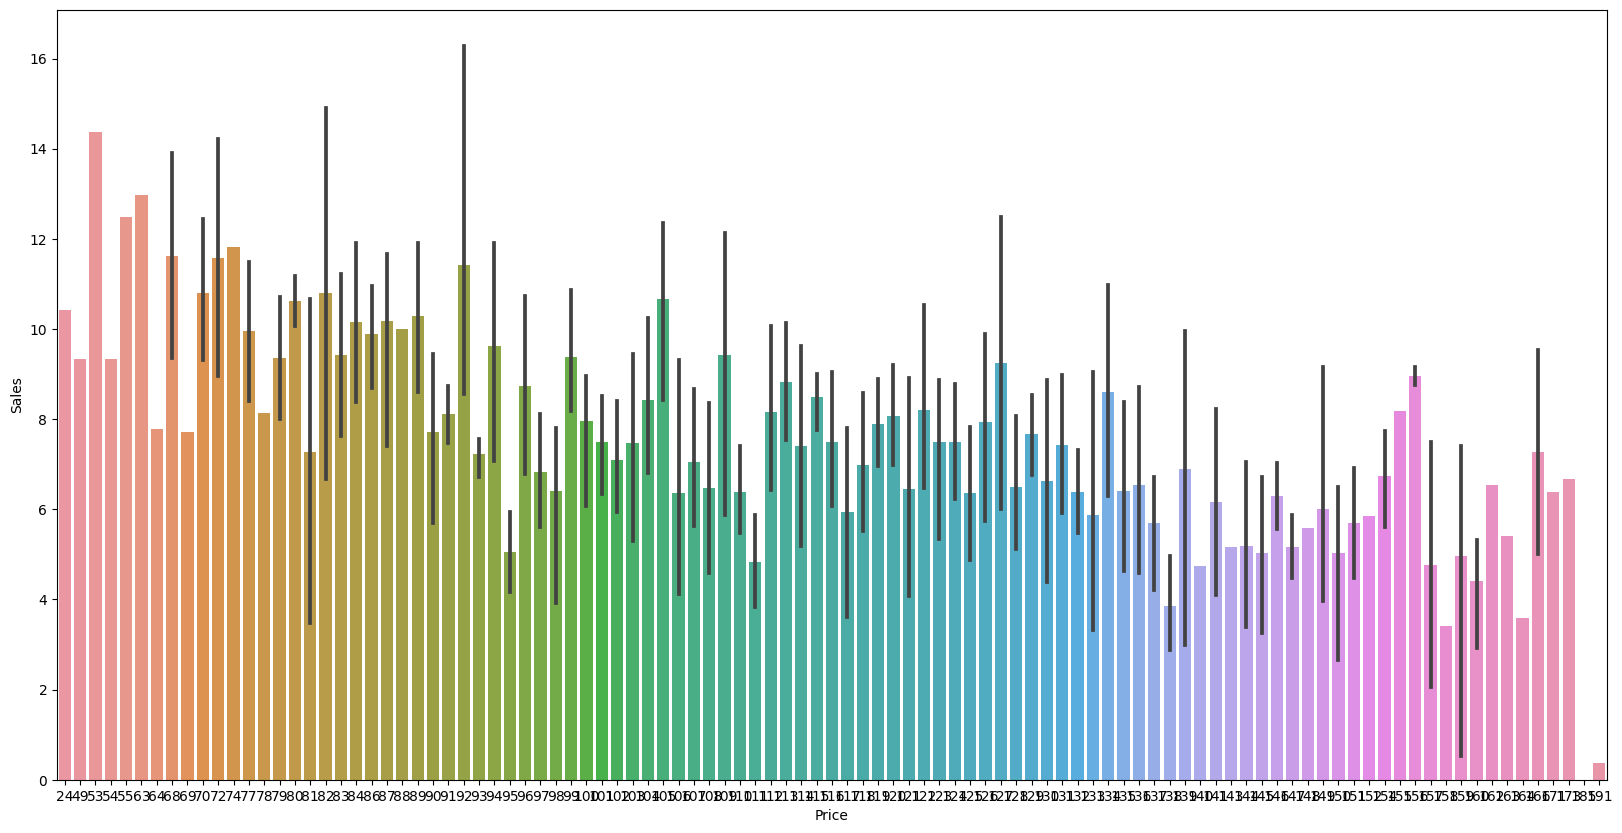

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Price',y='Sales',data=company1)

<Axes: xlabel='US', ylabel='Sales'>

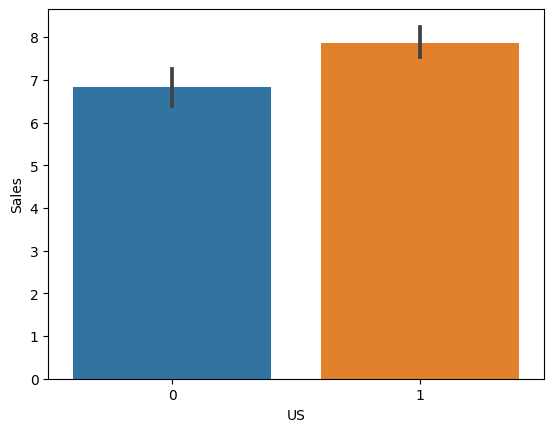

In [ ]:
sns.barplot(x='US', y='Sales', data=company)

<Axes: xlabel='Urban', ylabel='Sales'>

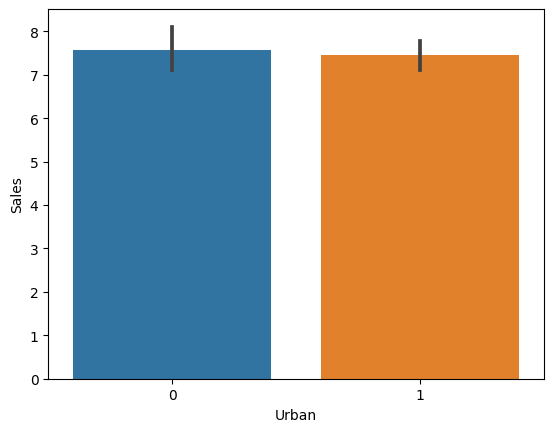

In [ ]:
sns.barplot(x='Urban', y='Sales', data=company1)

*Visualizeing the Relationship using correlation coeffiecnt*

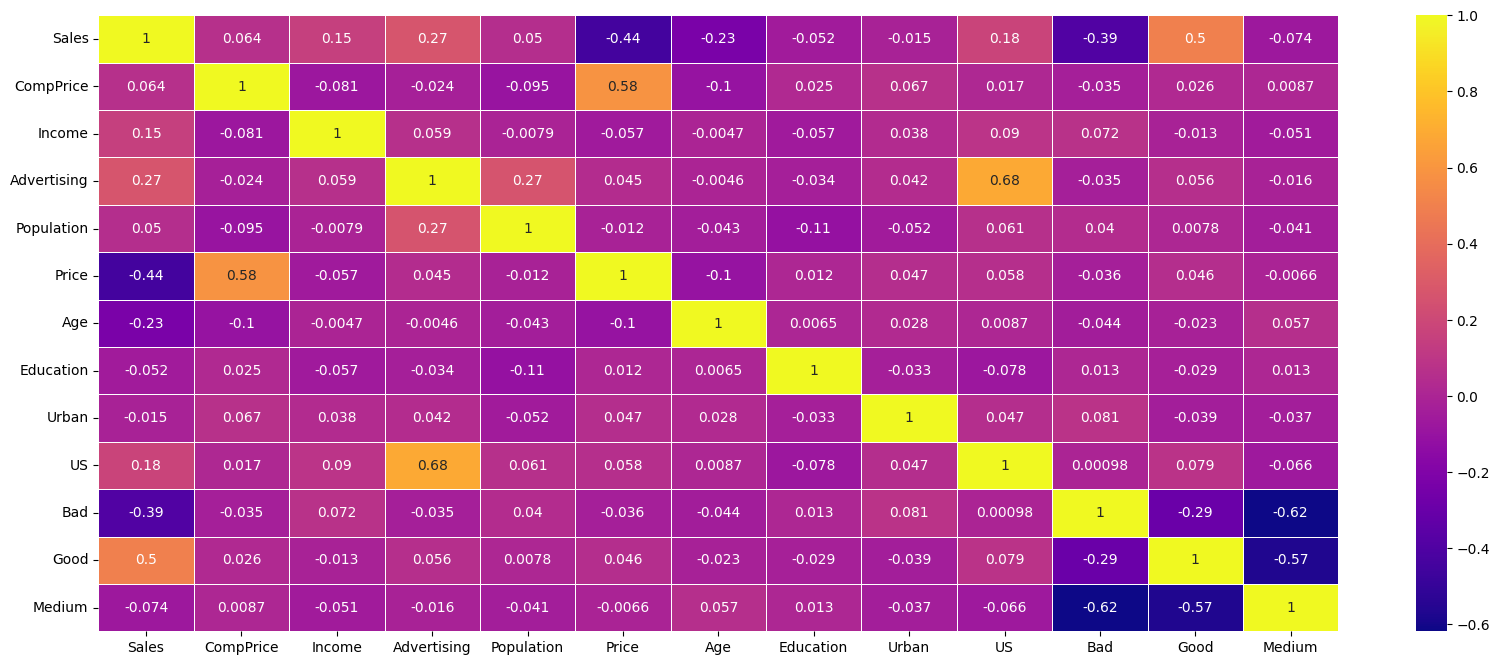

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(company1.corr(),annot=True, cmap='plasma',linewidths=0.5)
plt.show()

As we can see that sales with good shelving location has good relationship

*spliting X and Y*

In [ ]:

X = company1.iloc[:,1:]
y = company1.iloc[:,0]
X.shape, y.shape

((400, 12), (400,))

*Spliting The data*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 12), (100, 12), (300,), (100,))

*Building Model*

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

*ploting the decision tree*

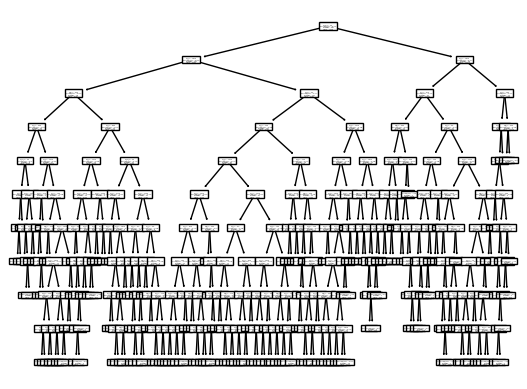

In [ ]:
from sklearn import tree
tree.plot_tree(model);

In [ ]:
model.score(X_test,y_test)

0.2614985582378

As we can see the accuracy score we can say that the model is not the good fit
we can always use other regression models to get the better fit

## Fraud Check Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (2).csv


In [ ]:
fraud = pd.read_csv('Fraud_check.csv', encoding='utf-8')
fraud.shape

(600, 6)

In [ ]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [ ]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [ ]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [ ]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud1 = pd.get_dummies(fraud, columns=['Marital.Status','Undergrad','Urban'])

In [ ]:
fraud1.head()

Taxable.Income  City.Population  Work.Experience  Marital.Status_Divorced  \
0           68833            50047               10                        0   
1           33700           134075               18                        1   
2           36925           160205               30                        0   
3           50190           193264               15                        0   
4           81002            27533               28                        0   

   Marital.Status_Married  Marital.Status_Single  Undergrad_NO  Undergrad_YES  \
0                       0                      1             1              0   
1                       0                      0             0              1   
2                       1                      0             1              0   
3                       0                      1             0              1   
4                       1                      0             1              0   

   Urban_NO  Urban_YES  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         1          0

In [ ]:
fraud1.drop(columns='Undergrad_NO',inplace=True)
fraud1.drop(columns='Urban_NO',inplace=True)

In [ ]:
fraud1.head()

Taxable.Income  City.Population  Work.Experience  Marital.Status_Divorced  \
0           68833            50047               10                        0   
1           33700           134075               18                        1   
2           36925           160205               30                        0   
3           50190           193264               15                        0   
4           81002            27533               28                        0   

   Marital.Status_Married  Marital.Status_Single  Undergrad_YES  Urban_YES  
0                       0                      1              0          1  
1                       0                      0              1          1  
2                       1                      0              0          1  
3                       0                      1              1          1  
4                       1                      0              0          0

In [ ]:
fraud1 = fraud1.rename({'Marital.Status_Divorced':'Divorced'},axis=1)
fraud1 = fraud1.rename({'Marital.Status_Married':'Married'},axis=1)
fraud1 = fraud1.rename({'Marital.Status_Single':'Single'},axis=1)
fraud1 = fraud1.rename({'Undergrad_YES':'Undergrad'},axis=1)
fraud1 = fraud1.rename({'Urban_YES':'Urban'},axis=1)

In [ ]:
fraud1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Divorced',
       'Married', 'Single', 'Undergrad', 'Urban'],
      dtype='object')

In [ ]:
fraud1.corr()

Taxable.Income  City.Population  Work.Experience  Divorced  \
Taxable.Income         1.000000        -0.064387        -0.001818  0.062099   
City.Population       -0.064387         1.000000         0.013135  0.004925   
Work.Experience       -0.001818         0.013135         1.000000 -0.014833   
Divorced               0.062099         0.004925        -0.014833  1.000000   
Married               -0.100611        -0.007035         0.033347 -0.468757   
Single                 0.037910         0.002087        -0.018123 -0.510435   
Undergrad             -0.049232         0.079579        -0.005362 -0.045101   
Urban                  0.070628        -0.040098        -0.094559 -0.065518   

                  Married    Single  Undergrad     Urban  
Taxable.Income  -0.100611  0.037910  -0.049232  0.070628  
City.Population -0.007035  0.002087   0.079579 -0.040098  
Work.Experience  0.033347 -0.018123  -0.005362 -0.094559  
Divorced        -0.468757 -0.510435  -0.045101 -0.065518  
Married          1.000000 -0.520317   0.015120  0.016771  
Single          -0.520317  1.000000   0.028883  0.047014  
Undergrad        0.015120  0.028883   1.000000 -0.000267  
Urban            0.016771  0.047014  -0.000267  1.000000

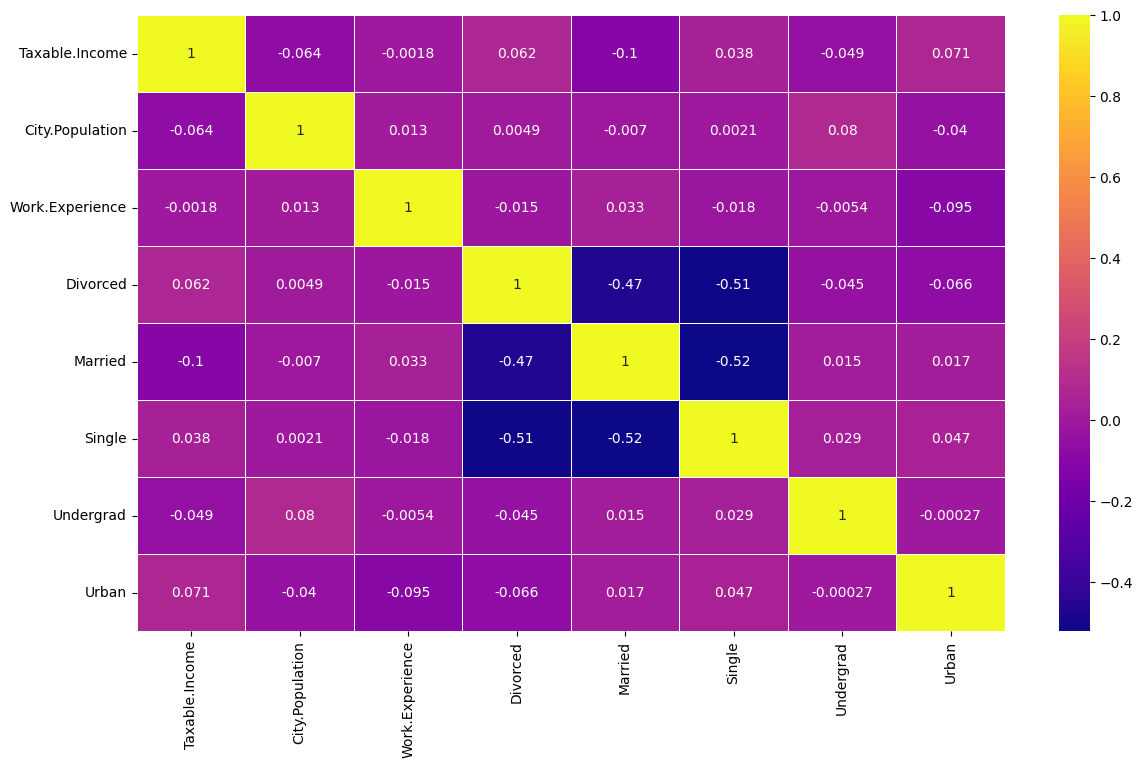

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(fraud1.corr(),annot=True,cmap='plasma',linewidths=0.5)
plt.show()

In [ ]:
fraud1.describe()

Taxable.Income  City.Population  Work.Experience    Divorced  \
count      600.000000       600.000000       600.000000  600.000000   
mean     55208.375000    108747.368333        15.558333    0.315000   
std      26204.827597     49850.075134         8.842147    0.464903   
min      10003.000000     25779.000000         0.000000    0.000000   
25%      32871.500000     66966.750000         8.000000    0.000000   
50%      55074.500000    106493.500000        15.000000    0.000000   
75%      78611.750000    150114.250000        24.000000    1.000000   
max      99619.000000    199778.000000        30.000000    1.000000   

          Married      Single   Undergrad       Urban  
count  600.000000  600.000000  600.000000  600.000000  
mean     0.323333    0.361667    0.520000    0.503333  
std      0.468139    0.480884    0.500017    0.500406  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000

In [ ]:
fraud1[fraud1['Taxable.Income'] <= 30000]

Taxable.Income  City.Population  Work.Experience  Divorced  Married  \
10            29732           102602               19         0        0   
12            11794           148033               14         1        0   
16            24987            34551               29         1        0   
19            10987           126953               30         0        0   
21            14310            29106                7         1        0   
..              ...              ...              ...       ...      ...   
544           29916           133877               21         0        0   
557           12810           157421               10         0        1   
567           16316           129912               30         0        0   
575           10735            95975               13         1        0   
591           27394           132859               18         0        0   

     Single  Undergrad  Urban  
10        1          0      1  
12        0          0      1  
16        0          1      0  
19        1          0      1  
21        0          1      1  
..      ...        ...    ...  
544       1          0      1  
557       0          1      0  
567       1          1      0  
575       0          0      1  
591       1          1      1  

[124 rows x 8 columns]

In [ ]:
fraud1[fraud1['Taxable.Income']>=30000]

Taxable.Income  City.Population  Work.Experience  Divorced  Married  \
0             68833            50047               10         0        0   
1             33700           134075               18         1        0   
2             36925           160205               30         0        1   
3             50190           193264               15         0        0   
4             81002            27533               28         0        1   
..              ...              ...              ...       ...      ...   
595           76340            39492                7         1        0   
596           69967            55369                2         1        0   
597           47334           154058                0         1        0   
598           98592           180083               17         0        1   
599           96519           158137               16         1        0   

     Single  Undergrad  Urban  
0         1          0      1  
1         0          1      1  
2         0          0      1  
3         1          1      1  
4         0          0      0  
..      ...        ...    ...  
595       0          1      1  
596       0          1      1  
597       0          0      1  
598       0          1      0  
599       0          0      0  

[476 rows x 8 columns]

In [ ]:
df = pd.DataFrame(fraud1)

In [ ]:
Target= np.empty(600, dtype=object)
i=0
for value in fraud1['Taxable.Income']:
  if value<=30000:
     Target[i]='Risky'
  else:
     Target[i]='Good'
  i = i+1

In [ ]:
Target

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [ ]:
df['Target'] = Target

In [ ]:
df.head()

Taxable.Income  City.Population  Work.Experience  Divorced  Married  \
0           68833            50047               10         0        0   
1           33700           134075               18         1        0   
2           36925           160205               30         0        1   
3           50190           193264               15         0        0   
4           81002            27533               28         0        1   

   Single  Undergrad  Urban Target  
0       1          0      1   Good  
1       0          1      1   Good  
2       0          0      1   Good  
3       1          1      1   Good  
4       0          0      0   Good

In [ ]:
df['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [ ]:
df.isnull().sum()

Taxable.Income     0
City.Population    0
Work.Experience    0
Divorced           0
Married            0
Single             0
Undergrad          0
Urban              0
Target             0
dtype: int64

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Taxable.Income, City.Population, Work.Experience, Divorced, Married, Single, Undergrad, Urban, Target]
Index: []

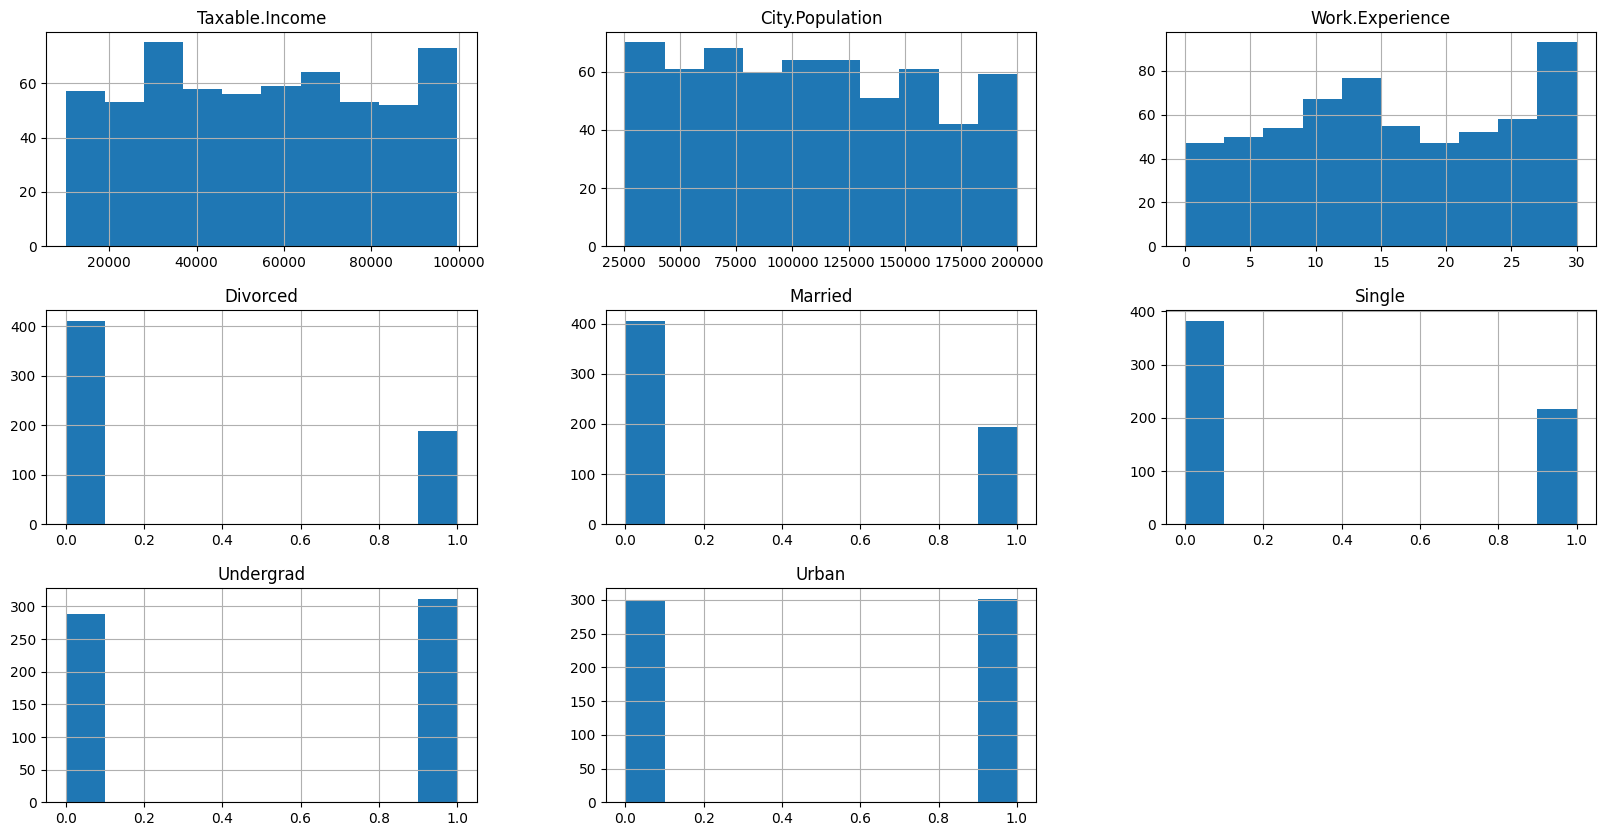

In [ ]:
df.hist(figsize=(20,10))
plt.show()

<Axes: >

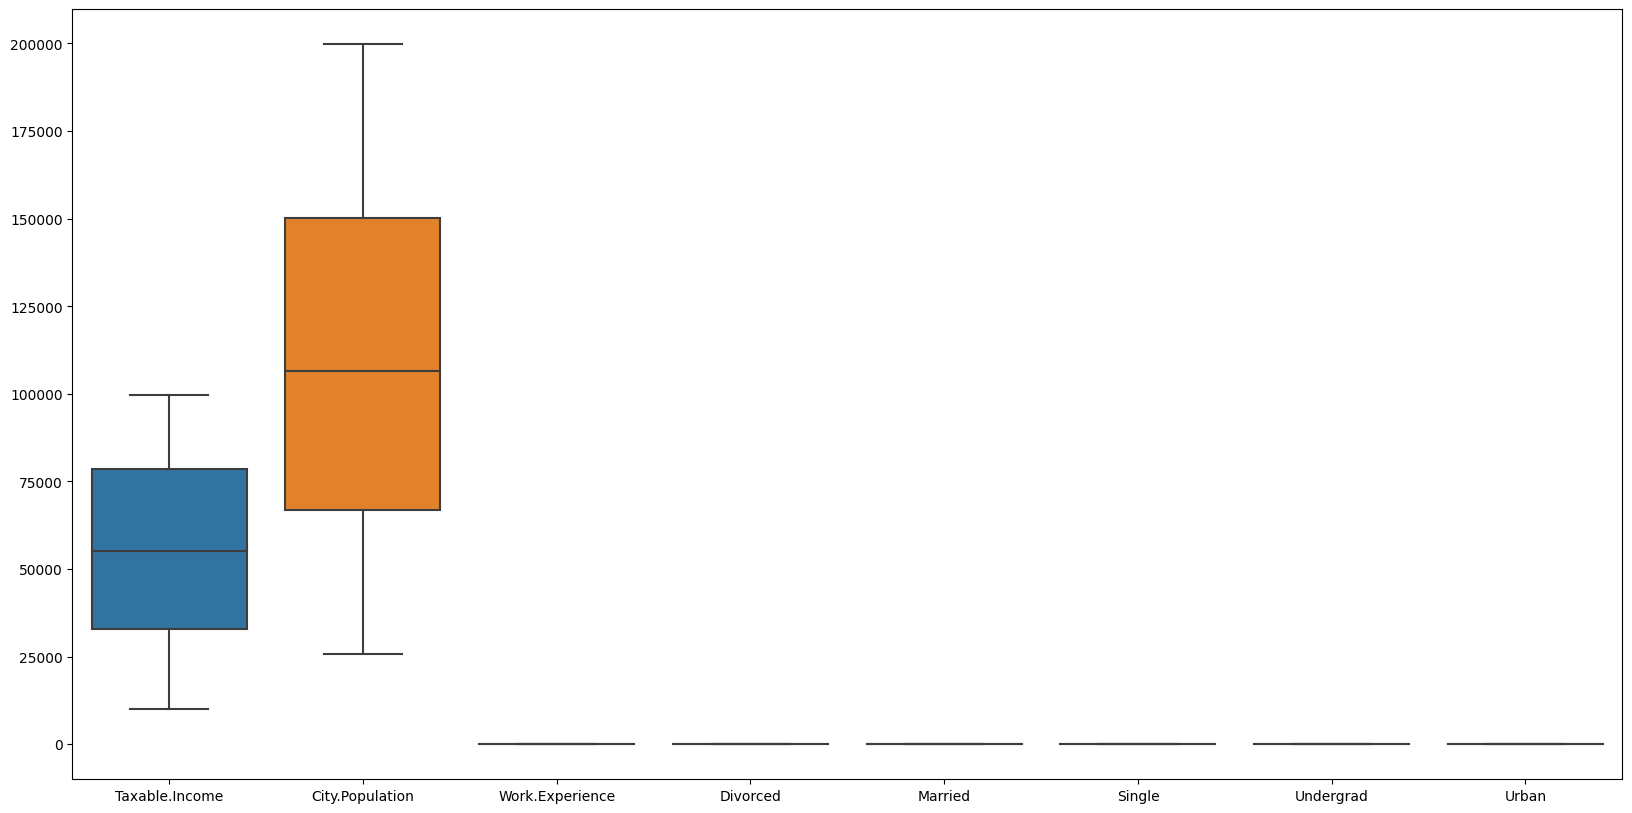

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='V')

<function matplotlib.pyplot.show(close=None, block=None)>

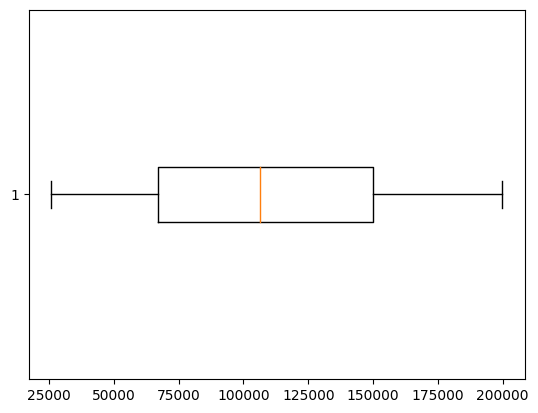

In [ ]:
plt.boxplot(df['City.Population'],vert=False)
plt.show

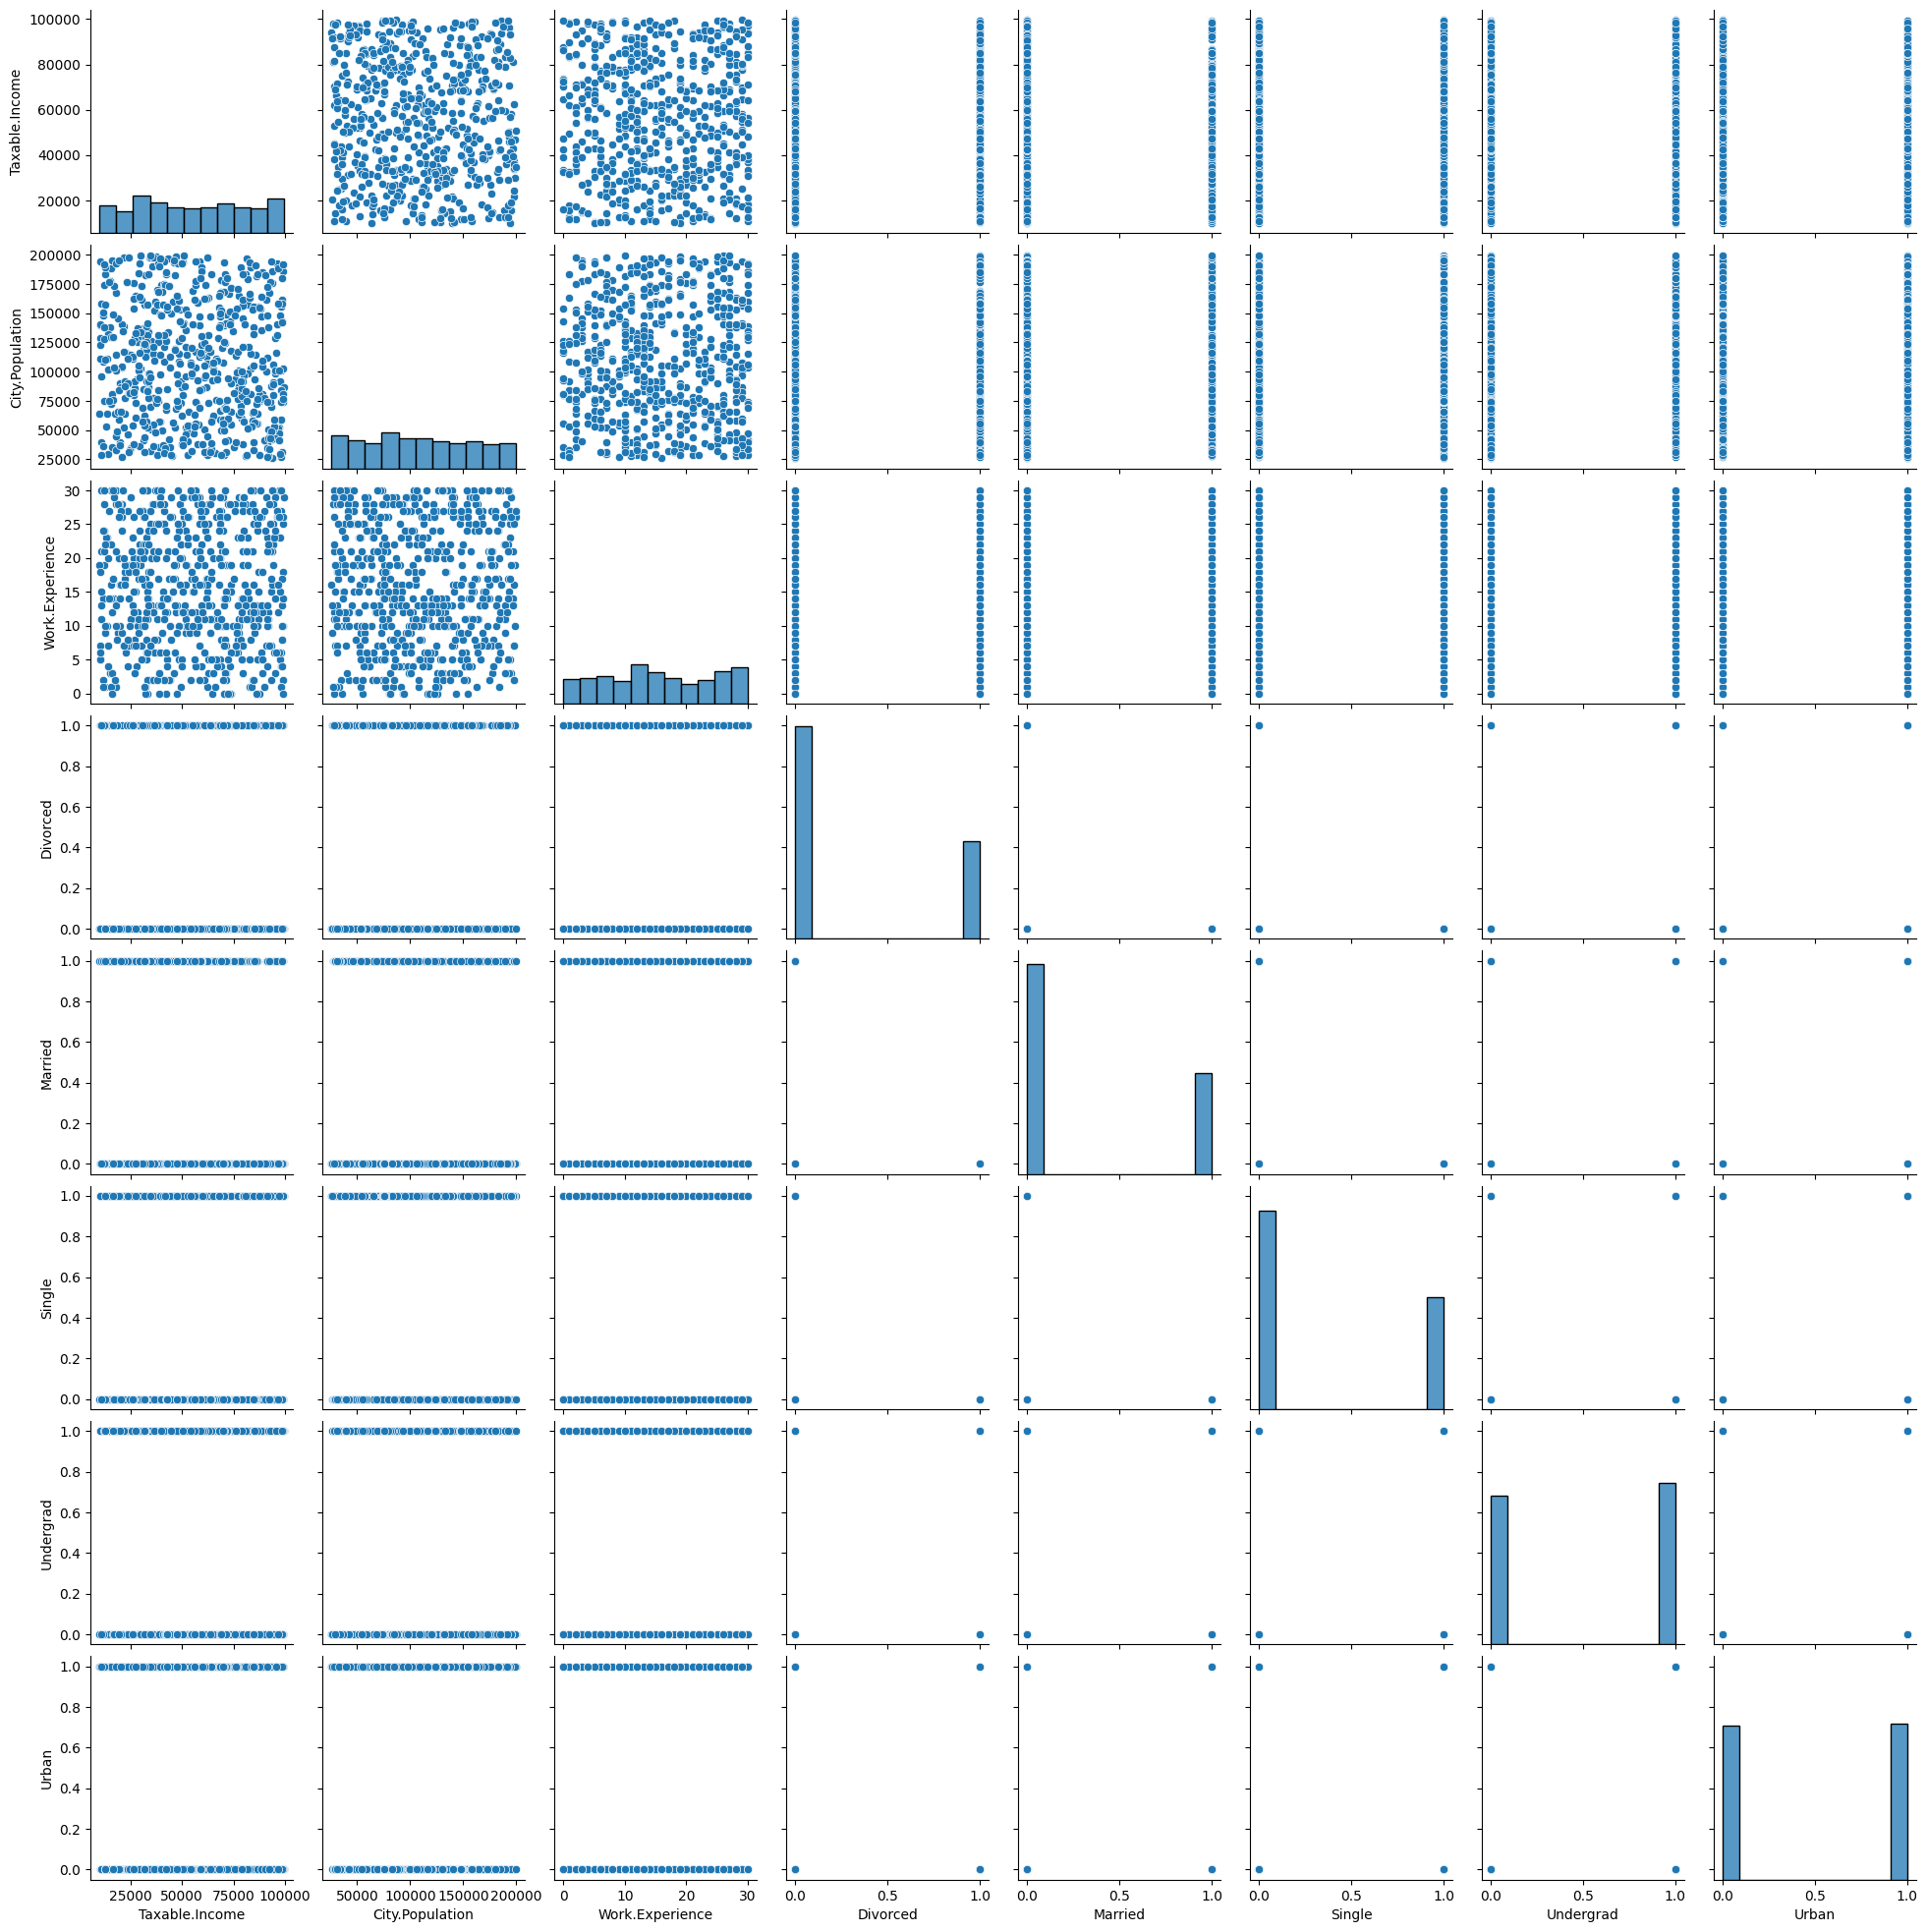

In [ ]:
sns.pairplot(df)

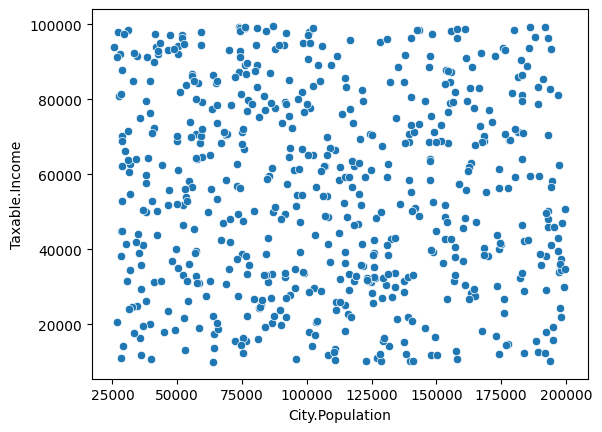

In [ ]:
sns.scatterplot(x='City.Population',y='Taxable.Income',data=df)
plt.show()

<Axes: xlabel='Undergrad', ylabel='Taxable.Income'>

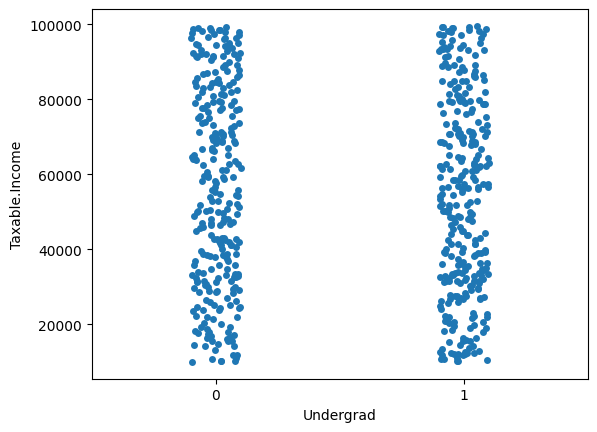

In [ ]:
sns.stripplot(x='Undergrad',y='Taxable.Income',data=df)

<Axes: xlabel='Urban', ylabel='Taxable.Income'>

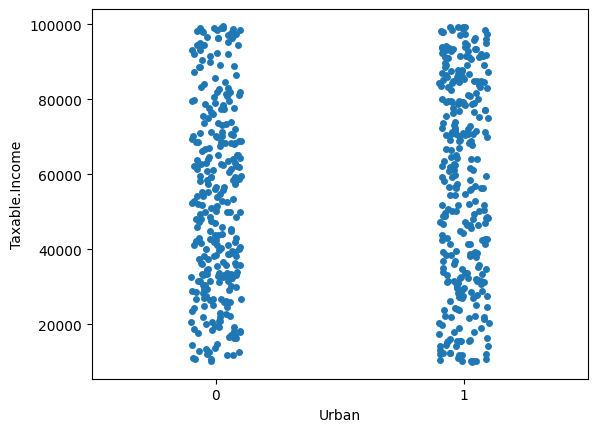

In [ ]:
sns.stripplot(x='Urban',y='Taxable.Income',data=df)

<Axes: xlabel='Marital.Status', ylabel='Taxable.Income'>

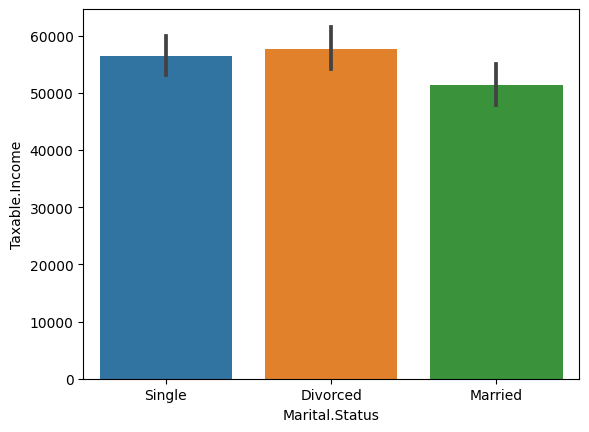

In [ ]:
sns.barplot(x='Marital.Status',y='Taxable.Income',data=fraud)

In [ ]:
df.head()

Taxable.Income  City.Population  Work.Experience  Divorced  Married  \
0           68833            50047               10         0        0   
1           33700           134075               18         1        0   
2           36925           160205               30         0        1   
3           50190           193264               15         0        0   
4           81002            27533               28         0        1   

   Single  Undergrad  Urban Target  
0       1          0      1   Good  
1       0          1      1   Good  
2       0          0      1   Good  
3       1          1      1   Good  
4       0          0      0   Good

In [ ]:
df['Target'] = df['Target'].replace({'Good': 0,'Risky': 1})

In [ ]:
df.head()

Taxable.Income  City.Population  Work.Experience  Divorced  Married  \
0           68833            50047               10         0        0   
1           33700           134075               18         1        0   
2           36925           160205               30         0        1   
3           50190           193264               15         0        0   
4           81002            27533               28         0        1   

   Single  Undergrad  Urban  Target  
0       1          0      1       0  
1       0          1      1       0  
2       0          0      1       0  
3       1          1      1       0  
4       0          0      0       0

In [ ]:
df['Target'].value_counts()

0    476
1    124
Name: Target, dtype: int64

In [ ]:
#spliting Independent and dependent Vairable
X = df.iloc[:,:-1]
y = df['Target']
X.shape, y.shape

((600, 8), (600,))

In [ ]:
X.head()

Taxable.Income  City.Population  Work.Experience  Divorced  Married  \
0           68833            50047               10         0        0   
1           33700           134075               18         1        0   
2           36925           160205               30         0        1   
3           50190           193264               15         0        0   
4           81002            27533               28         0        1   

   Single  Undergrad  Urban  
0       1          0      1  
1       0          1      1  
2       0          0      1  
3       1          1      1  
4       0          0      0

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420, 8), (180, 8), (420,), (180,))

Building The Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)#using Cart decision tree
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
preds = model_gini.predict(X_test)
preds

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

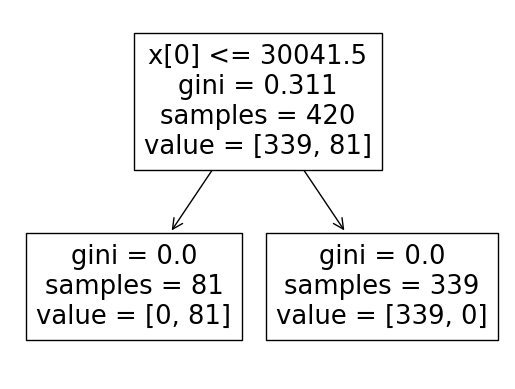

In [ ]:
from sklearn import tree
tree.plot_tree(model_gini);

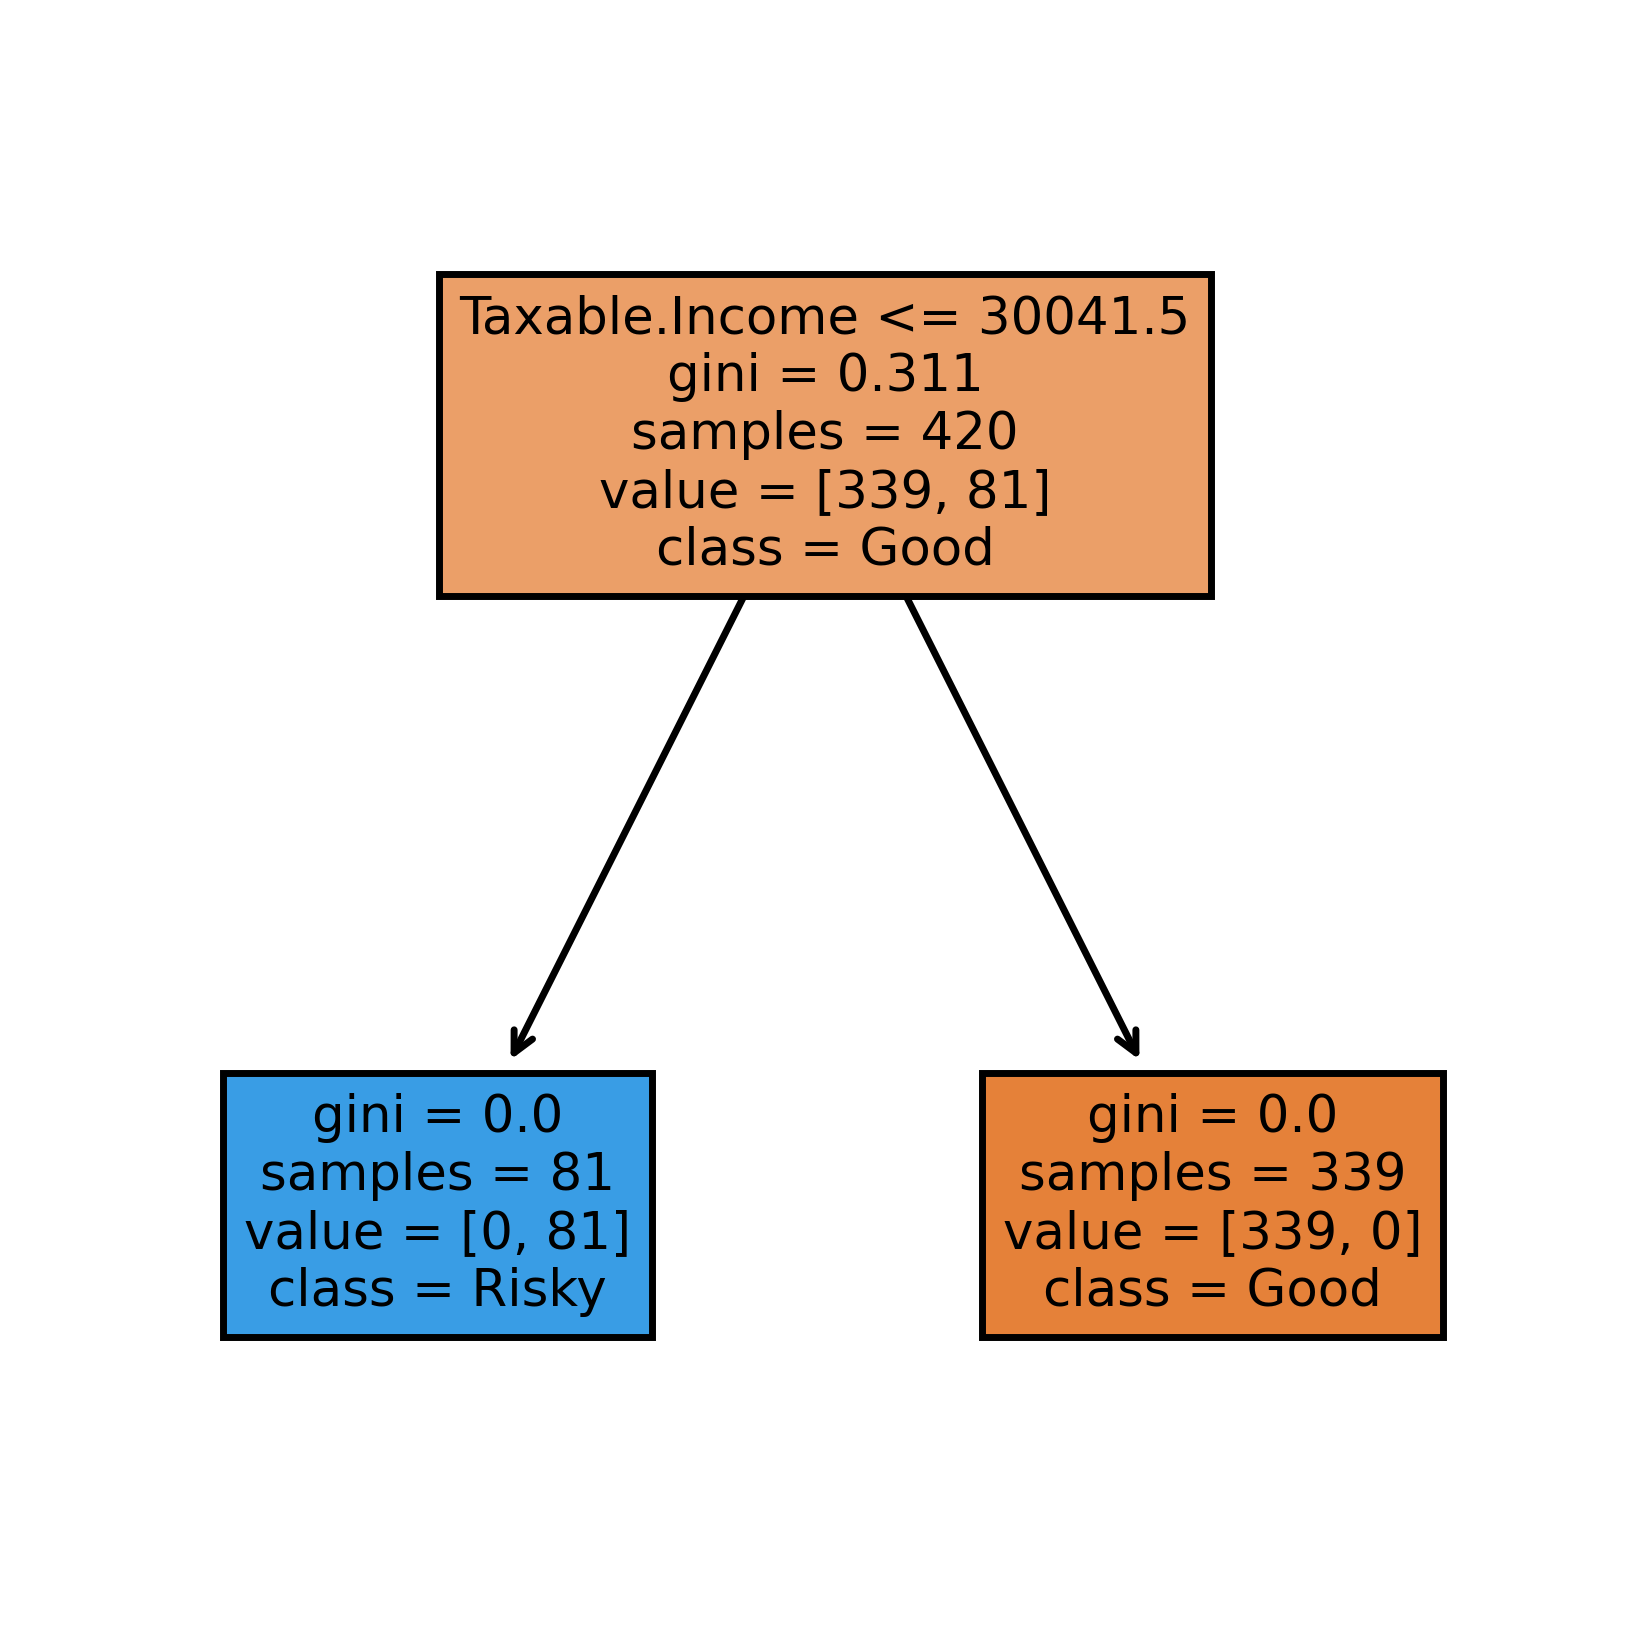

In [ ]:
fn = df.columns
cn = ['Good','Risky']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4),dpi=500)
tree.plot_tree(model_gini, feature_names = fn, class_names = cn, filled =True);

In [ ]:
from sklearn.metrics import accuracy_score

np.mean(preds==y_test),accuracy_score(y_test,preds)

(1.0, 1.0)

In [ ]:
from sklearn.metrics import classification_report
pd.crosstab(y_test,preds)

col_0     0   1
Target         
0       137   0
1         0  43

using C5.0 decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_c = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_c.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'x[0] <= 30041.5\nentropy = 0.707\nsamples = 420\nvalue = [339, 81]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 81\nvalue = [0, 81]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 339\nvalue = [339, 0]')]

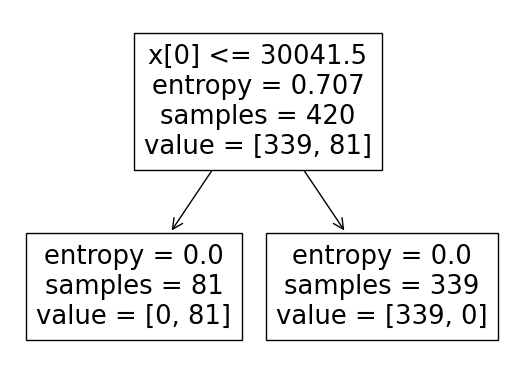

In [ ]:
from sklearn import tree
tree.plot_tree(model_c)

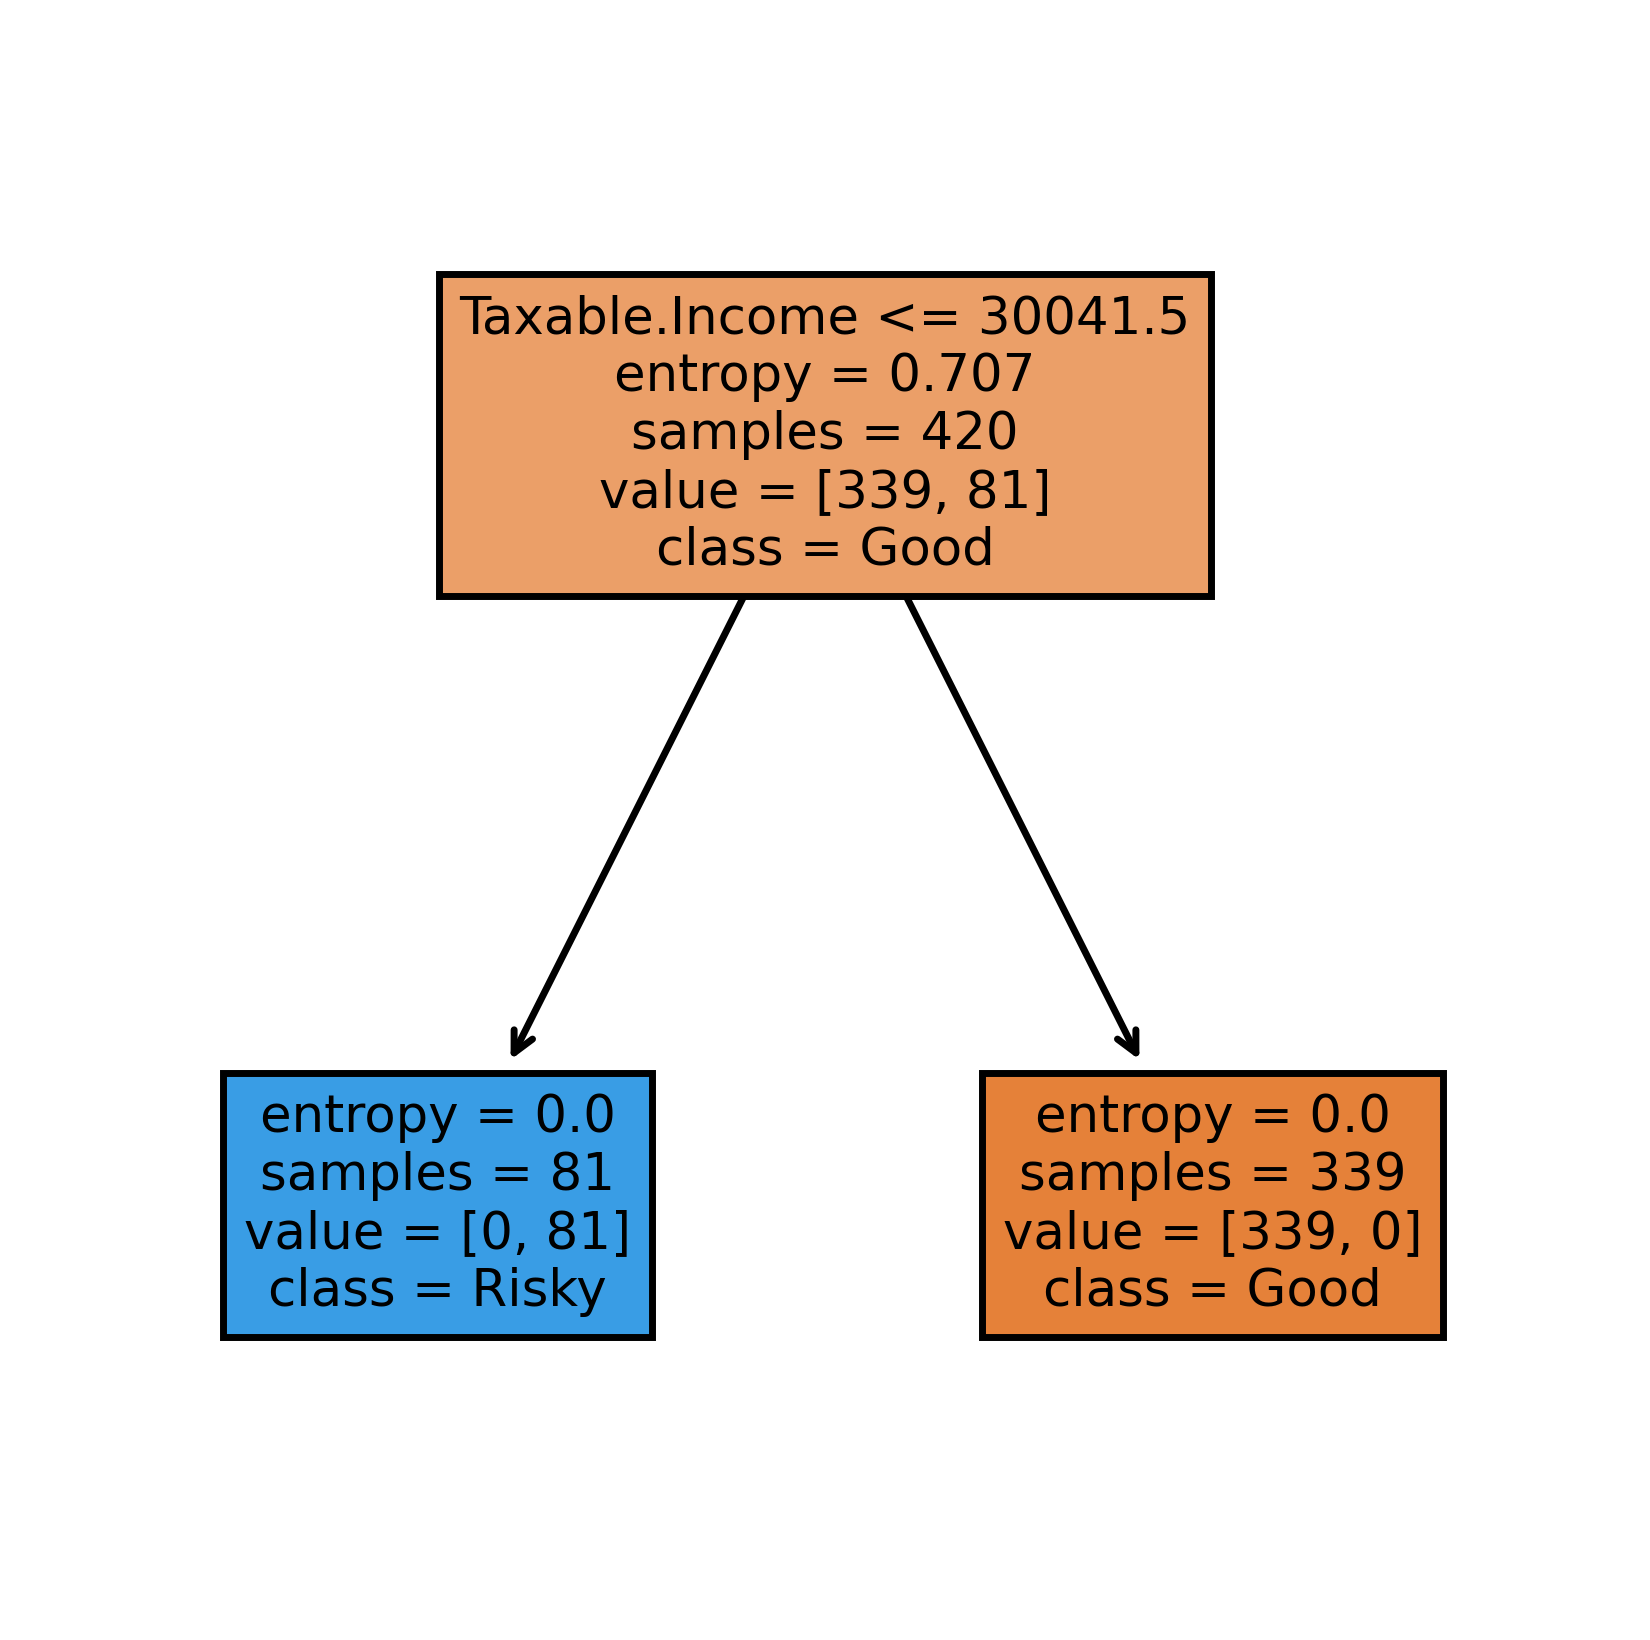

In [ ]:
fn = df.columns
cn = ['Good','Risky']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4),dpi=500)
tree.plot_tree(model_c, feature_names = fn, class_names = cn, filled =True);

In [ ]:
preds_c = model_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

np.mean(preds_c==y_test),accuracy_score(y_test,preds_c)

(1.0, 1.0)

In [ ]:
from sklearn.metrics import classification_report
pd.crosstab(y_test,preds_c)

col_0     0   1
Target         
0       137   0
1         0  43

as we can see that there is no miscalssification on the unknown data so that the model is good fit